In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
slf_df = pd.read_csv('./data/StressLevelDataset.csv')
slf_df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


## KNN with K-Fold Cross Validation
- Finding the best performing random state by looping from 1 to 50
- Using 10 folds
- Looping from 1 to 21 for the number of neighbors
- Saving anything above 0.89 accuracy to evaluate

In [3]:
x = np.array(slf_df.drop(columns=['stress_level']))
y = np.array(slf_df['stress_level'])

best_performing = []

for i in range(1, 50):
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=0.2, train_size=0.8)
    splits = KFold(n_splits=10)

    for k in range(1, 30, 2):
        scores = []
        for train_index, val_index in splits.split(X_train):
            X_sub_train = X_train[train_index]
            X_val = X_train[val_index]
            y_sub_train = y_train[train_index]
            y_val = y_train[val_index]
            
            clf = KNeighborsClassifier(n_neighbors=k)
            clf.fit(X_sub_train, y_sub_train)
            y_predict = clf.predict(X_val)
            scores.append(accuracy_score(y_val, y_predict))
        
        # print(k, np.mean(scores))
        if np.mean(scores) >= 0.89:
            best_performing.append([i, k, np.mean(scores)])

print(best_performing)

[[34, 1, 0.8954545454545453], [40, 13, 0.8909090909090909], [40, 15, 0.8920454545454545], [40, 27, 0.8909090909090909], [40, 29, 0.8920454545454545], [48, 3, 0.8931818181818182]]


## Confusion Matrix to visualize classification accuracy

1.0


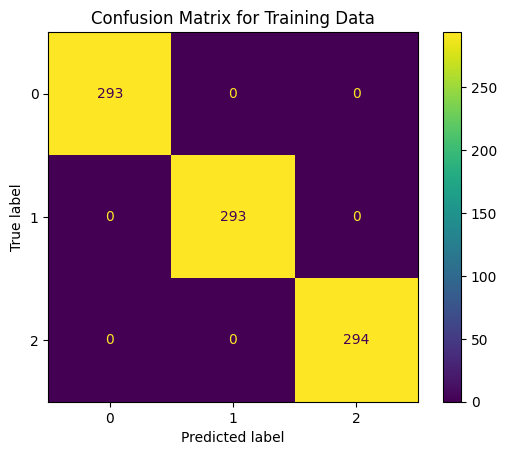

0.8227272727272728


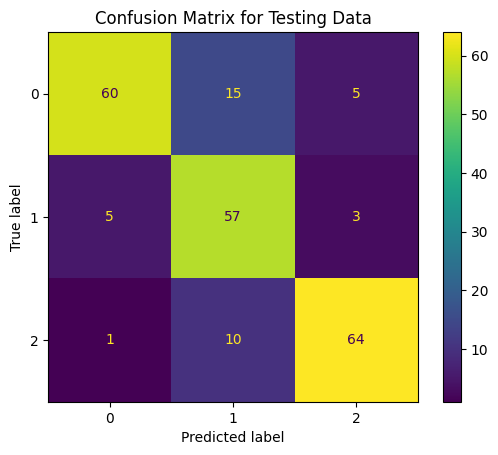

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=34, test_size=0.2, train_size=0.8)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
print(accuracy_score(y_train, y_predict))

training_cm = confusion_matrix(y_train, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(training_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Training Data")
plt.show()

y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

testing_cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(testing_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Testing Data")
plt.show()

